In [51]:
import pandas as pd
import numpy as np

In [ ]:
'''
1. From https://github.com/gagolews/teaching-data/tree/master/marek download the 
two following excerpts from the National Health and Nutrition Examination Survey 
(NHANES dataset): 
• nhanes_adult_male_bmx_2020.csv, 
• nhanes_adult_female_bmx_2020.csv. 
They give body measurements of adult males and females.
'''

In [52]:
'''
2. Read the two files as numpy matrices named male and female. Each matrix consists 
of seven 
columns:'''


#First, we'll read the two CSV files and convert them into NumPy matrices named male and female. We'll ensure that these matrices consist of only the specified seven columns.

# Replace 'male_file.csv' and 'female_file.csv' with your actual file names
male_file = 'nhanes_adult_male_bmx_2020.csv'
female_file = 'nhanes_adult_female_bmx_2020.csv'

# Read the files into numpy matrices
male = np.genfromtxt(male_file, delimiter=',', skip_header=1, usecols=(0,1,2,3,4,5,6))
female = np.genfromtxt(female_file, delimiter=',', skip_header=1, usecols=(0,1,2,3,4,5,6))

# Print the matrices
print("Male matrix:")
print(male)

print("\nFemale matrix:")
print(female)

Male matrix:
[[ 98.8 182.3  42.  ...  38.2 108.2 120.4]
 [ 74.3 184.2  41.1 ...  30.2  94.5  86.8]
 [103.7 185.3  47.  ...  32.  107.8 109.6]
 ...
 [108.8 168.7  38.6 ...  33.6 118.  114.7]
 [ 79.5 176.4  39.5 ...  31.4  99.8  97.1]
 [ 59.7 167.5  40.3 ...  29.2  90.5  86.9]]

Female matrix:
[[ 97.1 160.2  34.7 ...  35.8 126.1 117.9]
 [ 91.1 152.7  33.5 ...  38.5 125.5 103.1]
 [ 73.  161.2  37.4 ...  31.8 106.2  92. ]
 ...
 [ 73.  159.6  36.2 ...  31.4 104.6  99.3]
 [ 78.6 168.5  38.1 ...  36.  102.4  98.5]
 [ 82.8 147.8  34.8 ...  39.5 121.4 110. ]]


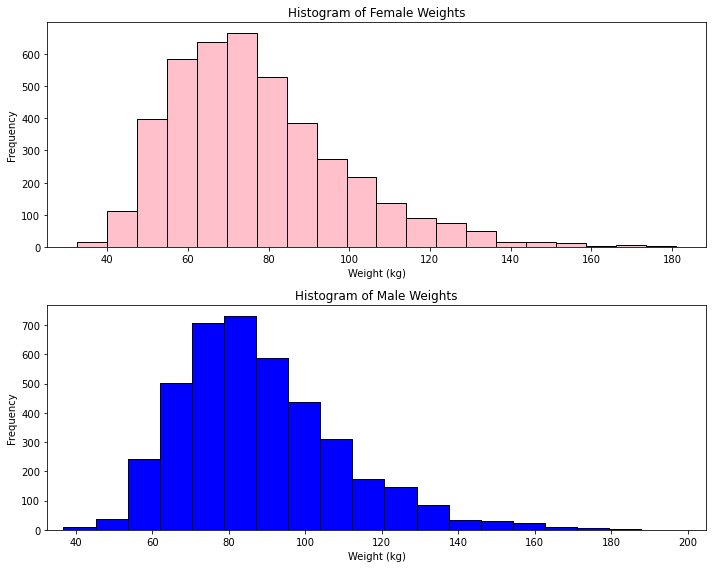

In [53]:
'''
3. On a single plot (use matplotlib.pytplot.subplot), draw two histograms: for female 
weights (top subfigure). and for male weights (bottom subfigure) Call 
matplotlib.pyplot.xlim to make the xaxis limits identical for both subfigures (work out the 
appropriate limits yourself). '''


#We'll use matplotlib to create a subplot with two histograms: one for female weights and one for male weights. The x-axis limits will be made identical for both plots.

import matplotlib.pyplot as plt

# Plot histograms
plt.figure(figsize=(10, 8))

# Top subplot: Female weights
plt.subplot(2, 1, 1)
plt.hist(female[:, 0], bins=20, color='pink', edgecolor='black')
plt.title('Histogram of Female Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

# Bottom subplot: Male weights
plt.subplot(2, 1, 2)
plt.hist(male[:, 0], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Male Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

# Set identical x-axis limits
plt.xlim([min(np.min(female[:, 0]), np.min(male[:, 0])), max(np.max(female[:, 0]), np.max(male[:, 0]))])

plt.tight_layout()
plt.show()

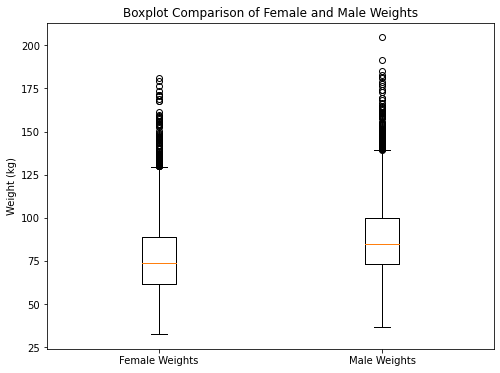

In [54]:
'''
4. Call matplotlib.pyplot.boxplot to draw a box-and-whisker plot, with two boxes side by 
side, giving the male and female weights so that they can be compared to each other. 
Note that the boxplot function can be fed with a list of two vectors like [female_weights, 
male_weights]. In your own words, discuss the results.'''

#We'll create a box-and-whisker plot to visually compare the distributions of male and female weights.
# Boxplot for comparison
plt.figure(figsize=(8, 6))
plt.boxplot([female[:, 0], male[:, 0]], labels=['Female Weights', 'Male Weights'])
plt.title('Boxplot Comparison of Female and Male Weights')
plt.ylabel('Weight (kg)')
plt.show()

'''
Discussion:
The boxplot visually shows the central tendency and variability of weights for both females and males. The median, quartiles, and potential outliers are visible, allowing for a quick comparison.
'''

In [55]:
'''
5. Compute the basic numerical aggregates of the male and female weights (measures 
of location, dispersion, and shape). In your own words, describe and compare the two 
distributions (e.g., are they left skewed, which one has more dispersion, and so forth). '''

#We'll compute the mean, median, standard deviation, skewness, and kurtosis for both male and female weights and compare them.
from scipy.stats import skew, kurtosis

# Compute aggregates for female and male weights
aggregates = {
    'Mean': [np.mean(female[:, 0]), np.mean(male[:, 0])],
    'Median': [np.median(female[:, 0]), np.median(male[:, 0])],
    'Standard Deviation': [np.std(female[:, 0]), np.std(male[:, 0])],
    'Skewness': [skew(female[:, 0]), skew(male[:, 0])],
    'Kurtosis': [kurtosis(female[:, 0]), kurtosis(male[:, 0])]
}

# Print the results
print(f"Female Weights: {aggregates['Mean'][0]:.2f}, {aggregates['Median'][0]:.2f}, {aggregates['Standard Deviation'][0]:.2f}, {aggregates['Skewness'][0]:.2f}, {aggregates['Kurtosis'][0]:.2f}")
print(f"Male Weights: {aggregates['Mean'][1]:.2f}, {aggregates['Median'][1]:.2f}, {aggregates['Standard Deviation'][1]:.2f}, {aggregates['Skewness'][1]:.2f}, {aggregates['Kurtosis'][1]:.2f}")

'''
Discussion:
These numerical aggregates provide insights into the central tendency, dispersion, and shape of the weight distributions for both genders. For instance, skewness indicates whether the distribution is left or right skewed, and kurtosis provides information on the "tailedness" of the distribution.
'''


Female Weights: 77.40, 73.60, 21.54, 1.03, 1.40
Male Weights: 88.36, 85.00, 21.42, 0.98, 1.47


In [56]:
'''
6. To the female matrix, add the eight column which gives the body mass indices of all 
the female participants. '''

# Compute BMI: weight (kg) / (height (m))^2
bmi_female = female[:, 0] / (female[:, 1] / 100) ** 2
female = np.column_stack((female, bmi_female))

print('After add eighth column no of column in female dataset:',female.shape[1]);

After add eighth column no of column in female dataset: 8


In [57]:
'''
7. Create a new matrix zfemale being a version of the female dataset with all its columns 
standardised (by computing the z-scores of each column).'''

# Standardize each column (z-scores)
zfemale = (female - np.mean(female, axis=0)) / np.std(female, axis=0)

# Print the matrices to verify
print("zfemale matrix:")
print(zfemale)

zfemale matrix:
[[ 9.14295084e-01  8.95037880e-03 -5.67394633e-01 ...  1.08316157e+00
   1.11578462e+00  9.96967703e-01]
 [ 6.35775985e-01 -1.05306843e+00 -1.07893145e+00 ...  1.04475528e+00
   2.65088995e-01  1.15617483e+00]
 [-2.04423297e-01  1.50552886e-01  5.83563204e-01 ... -1.90646881e-01
  -3.72932724e-01 -2.59275010e-01]
 ...
 [-2.04423297e-01 -7.60111255e-02  7.20263874e-02 ... -2.93063641e-01
   4.66671455e-02 -1.86280603e-01]
 [ 5.55278621e-02  1.18425119e+00  8.81959680e-01 ... -4.33886685e-01
   6.83598104e-04 -3.12019657e-01]
 [ 2.50491231e-01 -1.74692071e+00 -5.24766565e-01 ...  7.82312335e-01
   6.61697091e-01  1.00581950e+00]]


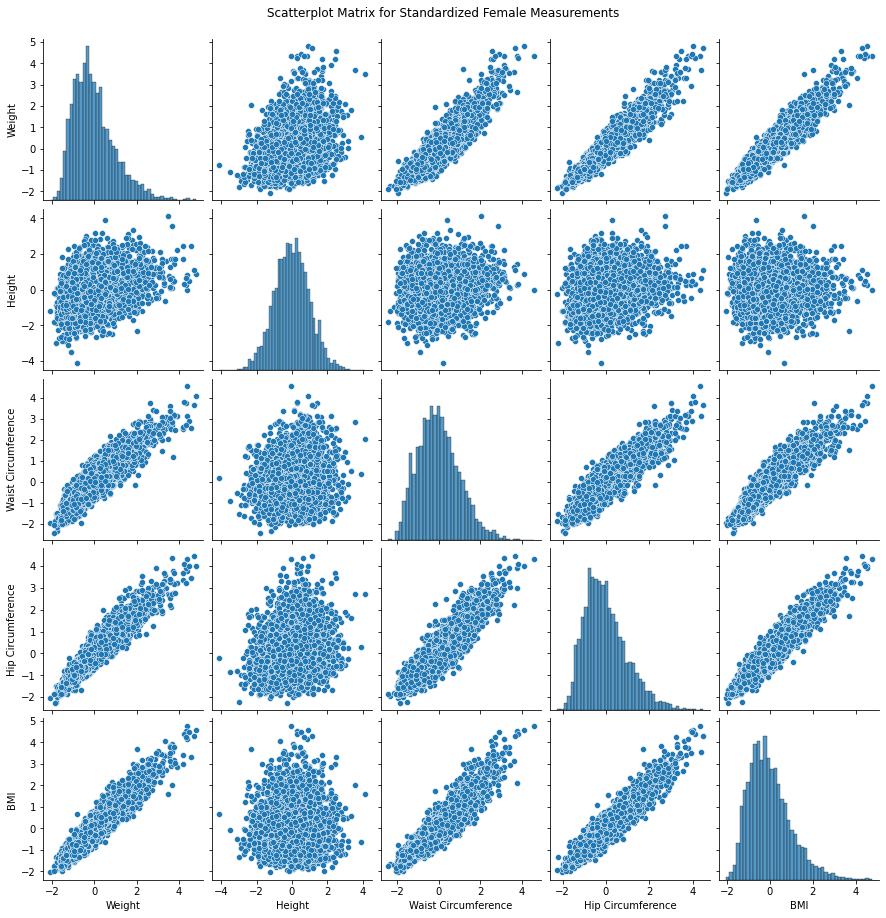

Pearson Correlation Coefficients:
                        Weight    Height  Waist Circumference  \
Weight               1.000000  0.345496             0.904550   
Height               0.345496  1.000000             0.126547   
Waist Circumference  0.904550  0.126547             1.000000   
Hip Circumference    0.946553  0.202895             0.897407   
BMI                  0.945900  0.033077             0.921198   

                     Hip Circumference       BMI  
Weight                        0.946553  0.945900  
Height                        0.202895  0.033077  
Waist Circumference           0.897407  0.921198  
Hip Circumference             1.000000  0.944199  
BMI                           0.944199  1.000000  
Spearman Correlation Coefficients:
                        Weight    Height  Waist Circumference  \
Weight               1.000000  0.338860             0.900169   
Height               0.338860  1.000000             0.108587   
Waist Circumference  0.900169  0.108587       

In [60]:
'''
8. Draw a scatterplot matrix (pairplot) for the standardised versions of height, weight, 
waist circumference, hip circumference, and BMI of the females (based on zfemale). 
Compute Pearson’s and Spearman’s correlation coefficients for all pairs of variables. 
Interpret the obtained results.'''

import seaborn as sns
import pandas as pd

# Create DataFrame with standardized variables
df_zfemale = pd.DataFrame(zfemale[:, [0, 1, 6, 5, 7]], columns=['Weight', 'Height', 'Waist Circumference', 'Hip Circumference', 'BMI'])

# Scatterplot matrix (pairplot)
sns.pairplot(df_zfemale)
plt.suptitle('Scatterplot Matrix for Standardized Female Measurements', y=1.02)
plt.show()

# Compute Pearson and Spearman correlations
pearson_corr = df_zfemale.corr(method='pearson')
spearman_corr = df_zfemale.corr(method='spearman')

print("Pearson Correlation Coefficients:\n", pearson_corr)
print("Spearman Correlation Coefficients:\n", spearman_corr)


In [61]:
'''
9. Compute the waist circumference to height ratio and the waist circumference to hip 
circumference ratio of the male and female participants by adding two more columns to 
the males and females matrices. '''

# Compute ratios
waist_to_height_female = female[:, 6] / female[:, 1]
waist_to_hip_female = female[:, 6] / female[:, 5]
female = np.column_stack((female, waist_to_height_female, waist_to_hip_female))
print('After add columns no of column in female dataset:',female.shape[1]);

waist_to_height_male = male[:, 6] / male[:, 1]
waist_to_hip_male = male[:, 6] / male[:, 5]
male = np.column_stack((male, waist_to_height_male, waist_to_hip_male))
print('After add column no of column in male dataset:',male.shape[1]);


After add columns no of column in female dataset: 10
After add column no of column in male dataset: 9


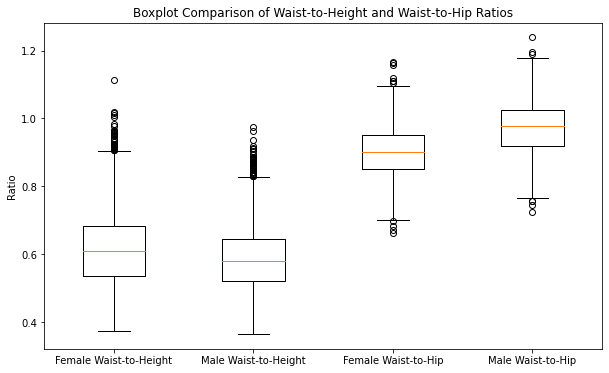

In [62]:
'''
10. Draw a box-and-whisker plot with four boxes side by side, comparing the distribution 
of the waistto-height ratio and the waist-to-hip ratio of both male and female participants. 
Explain what you see.'''

# Boxplot for waist-to-height and waist-to-hip ratios
plt.figure(figsize=(10, 6))
plt.boxplot([female[:, 8], male[:, 7], female[:, 9], male[:, 8]], labels=['Female Waist-to-Height', 'Male Waist-to-Height', 'Female Waist-to-Hip', 'Male Waist-to-Hip'])
plt.title('Boxplot Comparison of Waist-to-Height and Waist-to-Hip Ratios')
plt.ylabel('Ratio')
plt.show()

'''
Discussion: 
This boxplot comparison will reveal differences in body fat distribution between genders, as reflected in the waist-to-height and waist-to-hip ratios.
'''

In [ ]:
'''11. In your own words, list some advantages and disadvantages of BMI, waist-to-height 
ratio, and waist-to-hip ratio.'''

BMI

Advantages:
1. Simplicity and Ease of Calculation: BMI is straightforward to calculate using just height and weight, making it accessible for both individuals and healthcare professionals.
2. Widely Used: It’s a well-established metric used in numerous studies and health assessments, providing a common reference point for comparing body weight across populations.
3. Population-Level Analysis: BMI is useful for screening large groups to identify potential issues related to obesity and underweight, as it provides a general measure of body fat.

Disadvantages:
1. Doesn’t Differentiate Between Fat and Muscle: BMI does not account for muscle mass versus fat mass, potentially misclassifying athletes or muscular individuals as overweight or obese.
2. Doesn’t Consider Fat Distribution: It doesn’t provide information on where fat is distributed on the body, which can be an important factor in assessing health risks.
3. Age and Gender Variability: BMI does not account for differences in fat distribution and body composition across different ages and genders.

    
Waist-to-Height Ratio

Advantages:
1. Better Indicator of Abdominal Fat: WHtR is more indicative of abdominal fat compared to BMI, which is associated with a higher risk of cardiovascular and metabolic diseases.
2. Gender and Age Neutral: It tends to be a more universally applicable measure across different genders and age groups.
3. Simple Calculation: Like BMI, WHtR is easy to calculate and doesn’t require complex equipment or measurements.

Disadvantages:
1. Lack of Standardization: There is less consensus on the optimal thresholds for assessing health risks compared to BMI.
2. Limited by Measurement Accuracy: Accurate measurement of waist circumference and height is necessary for reliable results, and errors in these measurements can affect the outcome.
3. Doesn’t Account for Muscle Mass: Similar to BMI, it does not differentiate between muscle and fat.

    
Waist-to-Hip Ratio

Advantages:
1. Reflects Fat Distribution: WHR provides insight into how fat is distributed on the body, which is relevant for assessing health risks associated with abdominal fat.
2. Predicts Health Risks: It is a useful predictor of health risks like cardiovascular disease and type 2 diabetes due to its focus on fat distribution.
3. Applicable Across Genders: WHR can be used for both men and women and reflects differences in fat distribution patterns between the sexes.

Disadvantages:
1. Measurement Variability: Accurate measurement of waist and hip circumferences can be challenging and may vary based on technique and person performing the measurement.
2. Complexity Compared to BMI: WHR is slightly more complex to calculate and interpret than BMI, as it requires two measurements and has more variable thresholds.
3. Doesn’t Account for Overall Body Fat: WHR focuses on the ratio between waist and hip measurements but doesn’t provide information on overall body fat or muscle mass.


In [64]:
'''
12. Print out the standardised body measurements for the 5 persons with the lowest BMI 
and the 5 persons with the 5 highest BMI (e.g., call print for a subset of zfemale comprised 
of 10 chosen rows as determined by a call to numpy.argsort). Interpret the results. '''

# Sort by BMI and select rows with the lowest and highest BMI
sorted_indices = np.argsort(female[:, 7])
extreme_bmi_indices = np.concatenate((sorted_indices[:5], sorted_indices[-5:]))
extreme_bmi_measurements = zfemale[extreme_bmi_indices]

print("Standardized Measurements for Participants with Extreme BMI:\n", extreme_bmi_measurements)

'''
Interpretation: 
This step will allow us to explore the characteristics of individuals with very low and very high BMI, providing insights into their body composition.
'''

Standardized Measurements for Participants with Extreme BMI:
 [[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577]
 [ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782461  4.02124236
   4.08172343  4.54270932]
 [ 4.36328993 -0.03353037 -0.055